In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import bitcoin.db as db
df = db.get_all_data_from_pas(pas=1440)
df.describe()

2018-03-28 13:42:37,818 root         INFO     Load data from SQL.


,open,tw_sentiment,reddit_sentiment,google_sentiment,close,time,percent,up
count,22.00000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,7228.87000,0.067415,0.047191,0.016838,7101.057727,1.521213e+09,-1.488177,0.318182
std,745.91668,0.134743,0.035536,0.066045,599.212019,5.895936e+05,5.277240,0.476731
min,6160.01000,-0.126533,-0.014593,-0.068416,6176.600000,1.520272e+09,-10.226324,0.000000
25%,6719.21250,0.012247,0.022556,-0.035615,6692.475000,1.520727e+09,-4.911930,0.000000
50%,7064.43500,0.037904,0.039791,0.012000,6974.475000,1.521216e+09,-2.130159,0.000000
75%,7464.44500,0.056368,0.071727,0.061652,7447.490000,1.521697e+09,2.448896,1.000000
max,9322.01000,0.530768,0.121635,0.170432,8746.300000,1.522154e+09,8.513136,1.000000


In [2]:
from bitcoin.train import train
columns = ['open', 'google_sentiment']
history = train(df[columns].values, df[['close']].values)

2018-03-28 13:42:38,751 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 31/175
15/15 [==============================] - 0s 1ms/step - loss: 40.9957 - mean_squared_error: 0.1223 - mean_absolute_error: 0.2775 - val_loss: 39.1744 - val_mean_squared_error: 0.1261 - val_mean_absolute_error: 0.3285
Epoch 32/175
15/15 [==============================] - 0s 1ms/step - loss: 39.1198 - mean_squared_error: 0.1204 - mean_absolute_error: 0.2739 - val_loss: 37.3974 - val_mean_squared_error: 0.1199 - val_mean_absolute_error: 0.3193
Epoch 33/175
15/15 [==============================] - 0s 1ms/step - loss: 37.3557 - mean_squared_error: 0.1227 - mean_absolute_error: 0.2776 - val_loss: 35.6777 - val_mean_squared_error: 0.1122 - val_mean_absolute_error: 0.3076
Epoch 34/175
15/15 [==============================] - 0s 1ms/step - loss: 35.6403 - mean_squared_error: 0.1140 - mean_absolute_error: 0.2702 - val_loss: 34.0167 - val_mean_squared_error: 0.1053 - val_mean_absolute_error: 0.2967
Epoch 35/175
15/15 [==============================] - 0s 2ms/step - loss: 33.9879 - mean

15/15 [==============================] - 0s 1ms/step - loss: 6.2722 - mean_squared_error: 0.0586 - mean_absolute_error: 0.1982 - val_loss: 5.8574 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.1253
Epoch 68/175
15/15 [==============================] - 0s 1ms/step - loss: 5.8868 - mean_squared_error: 0.0390 - mean_absolute_error: 0.1547 - val_loss: 5.5623 - val_mean_squared_error: 0.0254 - val_mean_absolute_error: 0.1498
Epoch 69/175
15/15 [==============================] - 0s 1ms/step - loss: 5.5637 - mean_squared_error: 0.0401 - mean_absolute_error: 0.1512 - val_loss: 5.2647 - val_mean_squared_error: 0.0264 - val_mean_absolute_error: 0.1522
Epoch 70/175
15/15 [==============================] - 0s 1ms/step - loss: 5.2880 - mean_squared_error: 0.0486 - mean_absolute_error: 0.1755 - val_loss: 4.9723 - val_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.1390
Epoch 71/175
15/15 [==============================] - 0s 1ms/step - loss: 5.0222 - mean_squared_error: 0.0572

Epoch 104/175
15/15 [==============================] - 0s 1ms/step - loss: 1.1786 - mean_squared_error: 0.0528 - mean_absolute_error: 0.1696 - val_loss: 1.1018 - val_mean_squared_error: 0.0187 - val_mean_absolute_error: 0.1284
Epoch 105/175
15/15 [==============================] - 0s 1ms/step - loss: 1.1398 - mean_squared_error: 0.0511 - mean_absolute_error: 0.1664 - val_loss: 1.0662 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.1256
Epoch 106/175
15/15 [==============================] - 0s 1ms/step - loss: 1.0990 - mean_squared_error: 0.0419 - mean_absolute_error: 0.1583 - val_loss: 1.0438 - val_mean_squared_error: 0.0188 - val_mean_absolute_error: 0.1282
Epoch 107/175
15/15 [==============================] - 0s 1ms/step - loss: 1.0876 - mean_squared_error: 0.0543 - mean_absolute_error: 0.1720 - val_loss: 1.0316 - val_mean_squared_error: 0.0211 - val_mean_absolute_error: 0.1354
Epoch 108/175
15/15 [==============================] - 0s 1ms/step - loss: 1.0659 - mean_squ

Epoch 141/175
15/15 [==============================] - 0s 1ms/step - loss: 0.7585 - mean_squared_error: 0.0344 - mean_absolute_error: 0.1405 - val_loss: 0.7584 - val_mean_squared_error: 0.0232 - val_mean_absolute_error: 0.1418
Epoch 142/175
15/15 [==============================] - 0s 1ms/step - loss: 0.7426 - mean_squared_error: 0.0357 - mean_absolute_error: 0.1261 - val_loss: 0.7568 - val_mean_squared_error: 0.0227 - val_mean_absolute_error: 0.1404
Epoch 143/175
15/15 [==============================] - 0s 1ms/step - loss: 0.7607 - mean_squared_error: 0.0389 - mean_absolute_error: 0.1443 - val_loss: 0.7523 - val_mean_squared_error: 0.0205 - val_mean_absolute_error: 0.1341
Epoch 144/175
15/15 [==============================] - 0s 1ms/step - loss: 0.7632 - mean_squared_error: 0.0412 - mean_absolute_error: 0.1450 - val_loss: 0.7363 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.1229
Epoch 145/175
15/15 [==============================] - 0s 1ms/step - loss: 0.7749 - mean_squ

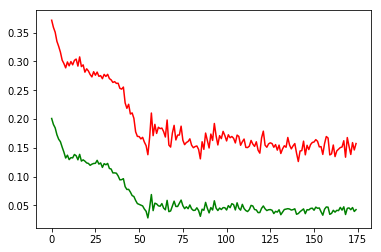

In [3]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

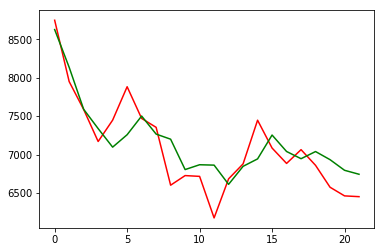

In [4]:
from keras.models import load_model
from sklearn.externals import joblib
import numpy as np

model = load_model('./model-BTC-EUR.h5')
scaler_x = joblib.load('model-scaler-x-BTC-EUR.pkl')
scaler_y = joblib.load('model-scaler-y-BTC-EUR.pkl')

X = np.array(df[['open', 'google_sentiment']])
X = scaler_x.transform(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

yp = model.predict(X)
yp = scaler_y.inverse_transform(yp)

plt.plot(df['close'], 'r')
plt.plot(yp, 'g')

In [5]:
import pandas as pd

df_computed = pd.DataFrame(columns=['real', 'predicted', 'diff'])
df_computed['real'] = df['close']
df_computed['predicted'] = yp
df_computed['diff'] = df['close'] - df_computed['predicted']
df_computed['computed'] = df_computed.apply(lambda x: x['predicted'] + 10 if x['diff'] < 0 else x['predicted'] -10, axis=1)
df_computed.describe()

,real,predicted,diff,computed
count,22.000000,22.000000,22.000000,22.000000
mean,7101.057727,7168.268555,-67.211294,7170.996294
std,599.212019,469.905914,311.505515,469.500625
min,6176.600000,6612.996094,-686.250586,6602.996094
25%,6692.475000,6864.093872,-184.050967,6874.093872
50%,6974.475000,7039.728760,-114.666035,7049.728760
75%,7447.490000,7264.323242,83.637305,7262.043945
max,8746.300000,8625.146484,623.611719,8615.146484


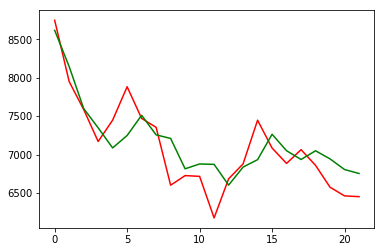

In [6]:
plt.plot(df['close'], 'r')
plt.plot(df_computed['computed'], 'g')

In [7]:
from bitcoin.validation import test_money_fee

test_money_fee(columns, df, regul=0.0)

2018-03-28 13:43:05,941 root         INFO     BUY
2018-03-28 13:43:05,944 root         INFO     SELL
2018-03-28 13:43:05,947 root         INFO     BUY
2018-03-28 13:43:05,952 root         INFO     TEST From 2018-03-22 12:41:00 to 2018-03-27 14:41:00
2018-03-28 13:43:05,953 root         INFO     With prediction 960.27 euros
2018-03-28 13:43:05,954 root         INFO     Without prediction 914.78 euros
